In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from glob import glob 

In [3]:
csv_files = glob("zippedData/*.csv.gz")

In [4]:
csv_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [5]:
import os

In [6]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [7]:
df_studio = csv_files_dict['bom_movie_gross_gz']

In [8]:
df_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [9]:
df_studio.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
pd.to_numeric(s,errors = 'coerce')

title
Toy Story 3                                    652000000.0
Alice in Wonderland (2010)                     691300000.0
Harry Potter and the Deathly Hallows Part 1    664300000.0
Inception                                      535700000.0
Shrek Forever After                            513900000.0
                                                  ...     
The Quake                                              NaN
Edward II (2018 re-release)                            NaN
El Pacto                                               NaN
The Swan                                               NaN
An Actor Prepares                                      NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [13]:
df_studio['foreign_gross'] = pd.to_numeric(df_studio['foreign_gross'], errors = 'coerce')

In [14]:
df_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2032 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 292.3+ KB


In [15]:
df_studio['foreign_gross'] = df_studio['foreign_gross'].fillna(0)

In [16]:
df_studio['Total_gross'] = df_studio['domestic_gross'] + df_studio['foreign_gross']

In [20]:
df_studio_1 = df_studio.groupby(['studio']).sum().sort_values(by = 'Total_gross', ascending = False)

In [21]:
df_studio_1

,domestic_gross,foreign_gross,year,Total_gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394535e+10,221575,2.240492e+10
...,...,...,...,...
Hiber,3.600000e+03,0.000000e+00,2017,3.600000e+03
ALP,2.800000e+03,0.000000e+00,2011,2.800000e+03
Synergetic,2.400000e+03,0.000000e+00,2018,2.400000e+03


In [22]:
df_studio_1['Average_gross'] = df_studio_1['Total_gross'].apply(lambda x: x/9)

In [23]:
df_studio_1

,domestic_gross,foreign_gross,year,Total_gross,Average_gross
studio,,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10,4.912542e+09
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10,3.445041e+09
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10,3.426217e+09
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10,3.306351e+09
Sony,8.459683e+09,1.394535e+10,221575,2.240492e+10,2.489435e+09
...,...,...,...,...,...
Hiber,3.600000e+03,0.000000e+00,2017,3.600000e+03,4.000000e+02
ALP,2.800000e+03,0.000000e+00,2011,2.800000e+03,3.111111e+02
Synergetic,2.400000e+03,0.000000e+00,2018,2.400000e+03,2.666667e+02


In [28]:
df_studio_2 = df_studio_1[0:10].sort_values(by = 'Total_gross', ascending = False)

Text(0, 0.5, 'Gross Revenue')

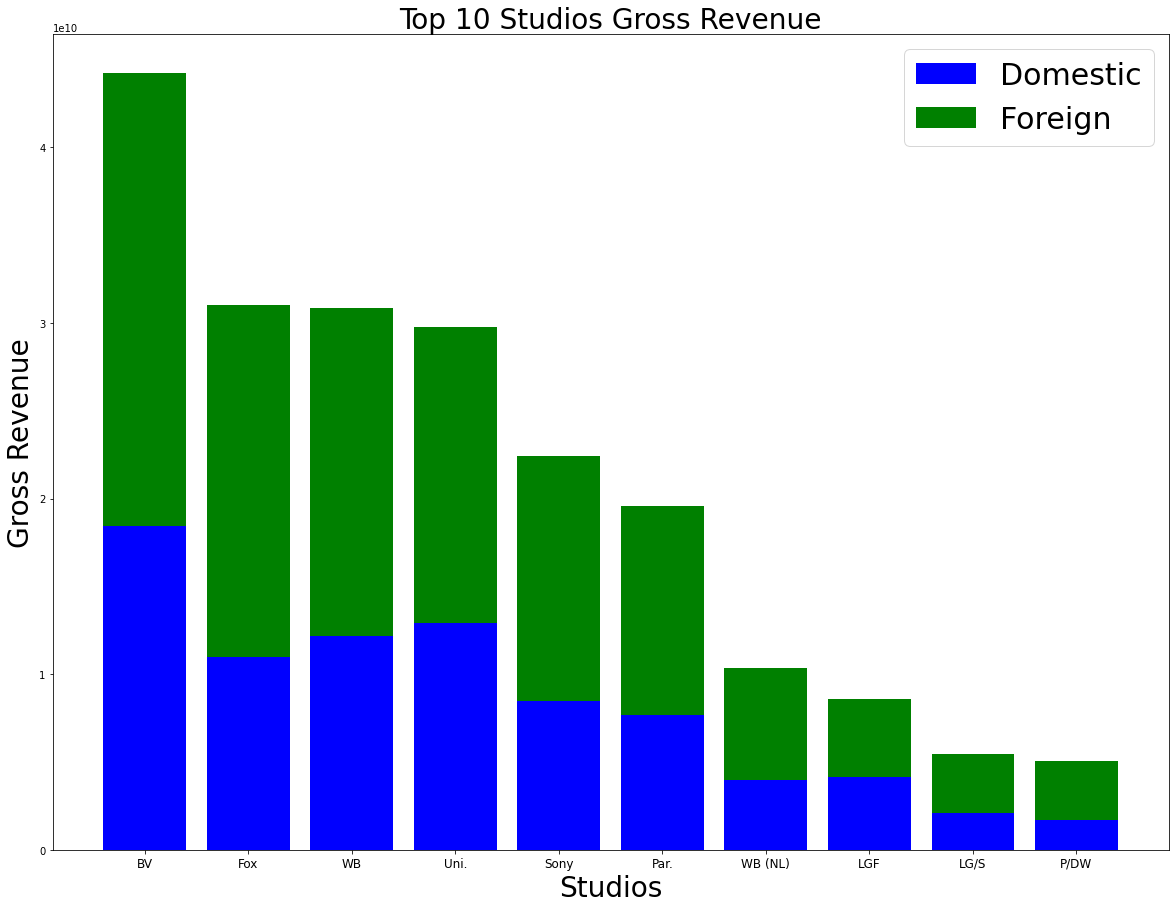

In [30]:
labels = df_studio_2.index
plt.figure(figsize=(20,15))
plt.bar(range(len(labels)), df_studio_2.domestic_gross, color='blue')
plt.bar(range(len(labels)), df_studio_2.foreign_gross, color='green', bottom =  df_studio_2.domestic_gross)
plt.xticks(range(len(labels)), labels, fontsize = 12)
plt.legend(['Domestic', 'Foreign'], fontsize = 30)
plt.title('Top 10 Studios Gross Revenue', fontsize=28)
plt.xlabel('Studios', fontsize=28)
plt.ylabel('Gross Revenue', fontsize=28)


Text(0, 0.5, 'Average Gross Revenue')

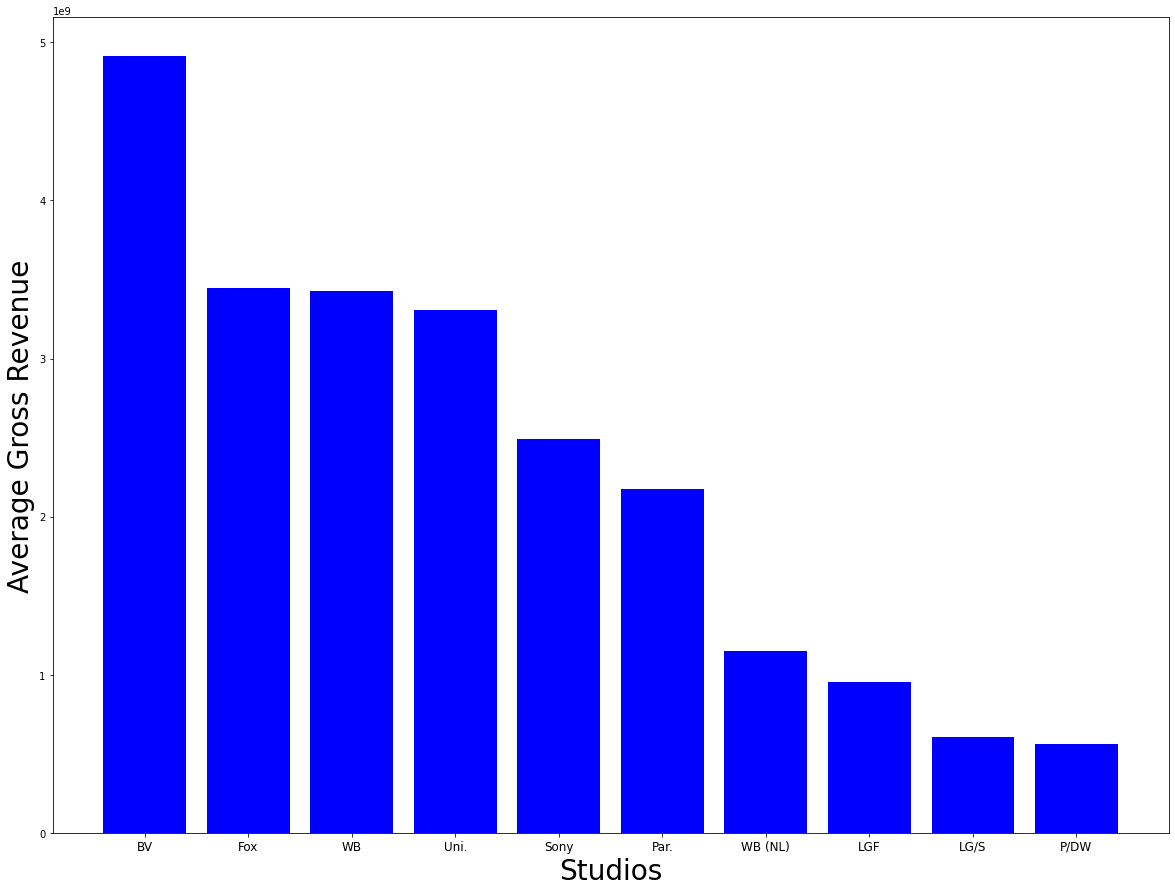

In [33]:
labels = df_studio_2.index
plt.figure(figsize=(20,15))
plt.bar(range(len(labels)), df_studio_2.Average_gross, color='blue')
plt.xticks(range(len(labels)), labels, fontsize = 12)
plt.xlabel('Studios', fontsize=28)
plt.ylabel('Average Gross Revenue', fontsize=28)